In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

2025-08-22 00:41:40.645875: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-22 00:41:40.737150: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-22 00:41:42.796590: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train = X_train/255.0
X_test = X_test/255.0

None


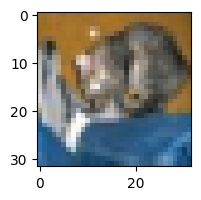

In [4]:
def show_plt(X,y,index):
    plt.figure(figsize=(5,2))
    plt.imshow(X[index])
print(show_plt(X_test,y_test,0))

In [5]:
cnn = models.Sequential([
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(32,(3,3) ,activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="softmax")
])

/home/ridoy/Documents/ML/ML Lab/ML LAB Exam/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1755801711.767332  769611 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1755801711.774126  769611 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
cnn.compile(optimizer="Adam",
            loss="sparse_categorical_crossentropy",
            metrics=(["accuracy"])
            )

In [7]:
history= cnn.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5


2025-08-22 00:41:55.333869: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 614400000 exceeds 10% of free system memory.


 475/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 32ms/step - accuracy: 0.2983 - loss: 1.9034

KeyboardInterrupt: 

In [8]:
loss,accuracy = cnn.evaluate(X_test,y_test,verbose=2)
print(f"The accuracy is - {100*accuracy:.3f}%")
# print(accuracy*100:.3f)

2025-08-22 00:42:44.518068: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 2s - 7ms/step - accuracy: 0.4536 - loss: 1.5141
The accuracy is - 45.360%


In [ ]:
pred = cnn.predict(X_test)

print(f"Predicted data - {np.round(pred, 3)}")
print(f"Test data - {y_test}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Predicted data - [[0.006 0.001 0.074 ... 0.002 0.001 0.002]
 [0.    0.027 0.    ... 0.    0.972 0.   ]
 [0.016 0.557 0.    ... 0.    0.375 0.051]
 ...
 [0.    0.    0.207 ... 0.003 0.    0.   ]
 [0.007 0.381 0.005 ... 0.003 0.    0.   ]
 [0.    0.    0.    ... 0.999 0.    0.   ]]
Test data - [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
